# Setting

## colab connection

In [396]:
from google.colab import drive
drive.mount('/content/data')

Drive already mounted at /content/data; to attempt to forcibly remount, call drive.mount("/content/data", force_remount=True).


In [397]:
# 한글깨짐 방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

## Library install & import

In [398]:
# 데이터 시각화에 사용할 라이브러리
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Global Variables

In [399]:
import easydict
import json
args = easydict.EasyDict()

# path 정보
args.default_path = '/content/data/MyDrive/Spaceship_Titanic/datas/'
args.train_csv = args.default_path+'train.csv'
args.test_csv = args.default_path+'test.csv'
args.default_submission_csv = args.default_path+'sample_submission.csv'
args.submission_csv = args.default_path+'submission_0414.csv'

# 데이터 분석을 위한 변수들
args.random_state = 21
args.results = []

## Load Data

- PassengerId: 각 승객의 고유 ID. 형식: gggg_pp. gggg: 함께 여행하는 그룹 pp: 그룹 내 승객의 번호. 같은 그룹이라고 항상 가족은 아님
- HomePlanet: 승객이 출발한 행성. 일반적으로 영구 거주하는 행성
- CryoSleep: 냉동수면 여부
- Cabin: 객실번호 덱/숫자/사이드 여기서 사이드는 좌측의 경우 p 우측의 경우 s
- Destination: 목적지
- Age: 승객의 나이 
- VIP: 승객의 vip 여부
- RoomService, FoodCourt, ShoppingMall, Spa, VRDeck: 승객이 해당 서비스에 지불한 금액
- Name: 승객의 이름
- Transported: (타겟) 도착 여부 

In [400]:
ori_train = pd.read_csv(args.train_csv)
ori_test = pd.read_csv(args.test_csv)

ori_train.shape, ori_test.shape 

((8693, 14), (4277, 13))

In [401]:
# 컬럼명 소문자로 바꾸기
ori_train.columns = ori_train.columns.str.lower()
ori_test.columns = ori_test.columns.str.lower()

# train data

In [402]:
ori_train.head()

,passengerid,homeplanet,cryosleep,cabin,destination,age,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,name,transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [403]:
ori_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passengerid   8693 non-null   object 
 1   homeplanet    8492 non-null   object 
 2   cryosleep     8476 non-null   object 
 3   cabin         8494 non-null   object 
 4   destination   8511 non-null   object 
 5   age           8514 non-null   float64
 6   vip           8490 non-null   object 
 7   roomservice   8512 non-null   float64
 8   foodcourt     8510 non-null   float64
 9   shoppingmall  8485 non-null   float64
 10  spa           8510 non-null   float64
 11  vrdeck        8505 non-null   float64
 12  name          8493 non-null   object 
 13  transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [404]:
ori_train[['group','passenger_num']] = ori_train['passengerid'].str.split("_",expand=True)
ori_test[['group','passenger_num']] = ori_test['passengerid'].str.split("_",expand=True)

ori_train.head()

,passengerid,homeplanet,cryosleep,cabin,destination,age,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,name,transported,group,passenger_num
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,01
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,01
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,01
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,02
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,01


In [405]:
ori_train.drop('passengerid', axis=1, inplace=True)
ori_train.head()

,homeplanet,cryosleep,cabin,destination,age,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,name,transported,group,passenger_num
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,01
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,01
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,01
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,02
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,01


In [406]:
ori_test.set_index(['passengerid'], inplace=True) 
print(f'{ori_test.shape}')
ori_test.head()

(4277, 14)


,homeplanet,cryosleep,cabin,destination,age,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,name,group,passenger_num
passengerid,,,,,,,,,,,,,,
0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,0013,01
0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,0018,01
0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,0019,01
0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,0021,01
0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,0023,01


## train_test_split

타겟과의 상관관계를 분석하기 위해 변수(X), 타겟(y)는 학습 직전에 나눔 

In [407]:
# 타겟 비율 확인 
new_transported = pd.Categorical(ori_train["transported"])
new_transported = new_transported.rename_categories(["No","Yes"])              
new_transported.describe()

,counts,freqs
categories,,
No,4315,0.496376
Yes,4378,0.503624


In [408]:
from sklearn.model_selection import train_test_split

In [409]:
X_tr, X_te = train_test_split(ori_train, test_size=0.3, stratify=ori_train['transported'], random_state=args.random_state)

In [410]:
print(f'X_tr.shape:{X_tr.shape}')
print(f'X_te.shape:{X_te.shape}')
X_tr.columns

X_tr.shape:(6085, 15)
X_te.shape:(2608, 15)


Index(['homeplanet', 'cryosleep', 'cabin', 'destination', 'age', 'vip',
       'roomservice', 'foodcourt', 'shoppingmall', 'spa', 'vrdeck', 'name',
       'transported', 'group', 'passenger_num'],
      dtype='object')

# Data Processing

## EDA

In [411]:
train = X_tr.copy() 
test = X_te.copy() 
ori_te = ori_test.copy()

train.shape, test.shape, ori_te.shape

((6085, 15), (2608, 15), (4277, 14))

In [412]:
train.corr()

,age,roomservice,foodcourt,shoppingmall,spa,vrdeck,transported
age,1.000000,0.074568,0.132163,0.021509,0.126236,0.097673,-0.087896
roomservice,0.074568,1.000000,-0.009465,0.057225,0.019916,-0.009984,-0.239034
foodcourt,0.132163,-0.009465,1.000000,-0.015955,0.214272,0.244980,0.043532
shoppingmall,0.021509,0.057225,-0.015955,1.000000,0.021355,0.002455,0.004801
spa,0.126236,0.019916,0.214272,0.021355,1.000000,0.171976,-0.216965
vrdeck,0.097673,-0.009984,0.244980,0.002455,0.171976,1.000000,-0.213162
transported,-0.087896,-0.239034,0.043532,0.004801,-0.216965,-0.213162,1.000000


룸서비스 스파 << 관련성 높음

## Drop values

In [413]:
train.head()

,homeplanet,cryosleep,cabin,destination,age,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,name,transported,group,passenger_num
4048,Mars,True,F/810/S,55 Cancri e,1.0,False,0.0,0.0,0.0,0.0,0.0,Trion Brie,True,4324,04
7129,Earth,True,G/1231/S,PSO J318.5-22,67.0,False,0.0,0.0,0.0,0.0,0.0,Danie Ingston,True,7598,01
8550,Earth,False,G/1485/P,TRAPPIST-1e,21.0,False,0.0,1.0,0.0,808.0,0.0,Hardy Graneyes,False,9129,01
2279,Mars,True,E/146/P,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Tark Nacke,False,2449,02
3981,Earth,False,F/879/P,TRAPPIST-1e,29.0,False,715.0,0.0,NaN,698.0,106.0,Dorice Connelson,False,4251,01


In [414]:
train[['first name', 'last name']] = train['name'].str.split(" ", expand=True)
test[['first name', 'last name']] = test['name'].str.split(" ", expand=True)
ori_te[['first name', 'last name']] = ori_te['name'].str.split(" ", expand=True)

In [415]:
train['name'].nunique(), train['last name'].nunique(), train.shape[0]

(5949, 2041, 6085)

In [416]:
train.drop(['name', 'first name'], axis=1, inplace=True)
test.drop(['name', 'first name'], axis=1, inplace=True)
ori_te.drop(['name', 'first name'], axis=1, inplace=True)

In [417]:
train[['room_deck', 'room_num', 'room_side']] = train['cabin'].str.split("/", expand=True)
test[['room_deck', 'room_num', 'room_side']] = test['cabin'].str.split("/", expand=True)
ori_te[['room_deck', 'room_num', 'room_side']] = ori_te['cabin'].str.split("/", expand=True)

train.head()

,homeplanet,cryosleep,cabin,destination,age,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,transported,group,passenger_num,last name,room_deck,room_num,room_side
4048,Mars,True,F/810/S,55 Cancri e,1.0,False,0.0,0.0,0.0,0.0,0.0,True,4324,04,Brie,F,810,S
7129,Earth,True,G/1231/S,PSO J318.5-22,67.0,False,0.0,0.0,0.0,0.0,0.0,True,7598,01,Ingston,G,1231,S
8550,Earth,False,G/1485/P,TRAPPIST-1e,21.0,False,0.0,1.0,0.0,808.0,0.0,False,9129,01,Graneyes,G,1485,P
2279,Mars,True,E/146/P,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,False,2449,02,Nacke,E,146,P
3981,Earth,False,F/879/P,TRAPPIST-1e,29.0,False,715.0,0.0,NaN,698.0,106.0,False,4251,01,Connelson,F,879,P


In [418]:
train['cabin'].nunique(), train.shape[0]

(4862, 6085)

## Missing Values

In [419]:
train.isnull().sum()

homeplanet       137
cryosleep        156
cabin            139
destination      125
age              127
vip              147
roomservice      124
foodcourt        131
shoppingmall     143
spa              124
vrdeck           137
transported        0
group              0
passenger_num      0
last name        129
room_deck        139
room_num         139
room_side        139
dtype: int64

In [420]:
test.isnull().sum()

homeplanet       64
cryosleep        61
cabin            60
destination      57
age              52
vip              56
roomservice      57
foodcourt        52
shoppingmall     65
spa              59
vrdeck           51
transported       0
group             0
passenger_num     0
last name        71
room_deck        60
room_num         60
room_side        60
dtype: int64

In [421]:
ori_te.isnull().sum()

homeplanet        87
cryosleep         93
cabin            100
destination       92
age               91
vip               93
roomservice       82
foodcourt        106
shoppingmall      98
spa              101
vrdeck            80
group              0
passenger_num      0
last name         94
room_deck        100
room_num         100
room_side        100
dtype: int64

In [422]:
train.drop(['cabin'], axis=1, inplace=True)
test.drop(['cabin'], axis=1, inplace=True)
ori_te.drop(['cabin'], axis=1, inplace=True)

In [423]:
homeplanet_mode = train['homeplanet'].mode().values[0]
cryosleep_mode = train['cryosleep'].mode().values[0]
destination_mode = train['destination'].mode().values[0]
vip_mode = train['vip'].mode().values[0]
room_deck_mode = train['room_deck'].mode().values[0]
room_side_mode = train['room_side'].mode().values[0]

In [424]:
train['homeplanet'].fillna(homeplanet_mode, inplace=True)
test['homeplanet'].fillna(homeplanet_mode, inplace=True)
ori_te['homeplanet'].fillna(homeplanet_mode, inplace=True)

In [425]:
train['cryosleep'].fillna(cryosleep_mode, inplace=True)
test['cryosleep'].fillna(cryosleep_mode, inplace=True)
ori_te['cryosleep'].fillna(cryosleep_mode, inplace=True)

In [426]:
train['destination'].fillna(destination_mode, inplace=True)
test['destination'].fillna(destination_mode, inplace=True)
ori_te['destination'].fillna(destination_mode, inplace=True)

In [427]:
train['vip'].fillna(vip_mode, inplace=True)
test['vip'].fillna(vip_mode, inplace=True)
ori_te['vip'].fillna(vip_mode, inplace=True)

In [428]:
train['room_deck'].fillna(room_deck_mode, inplace=True)
test['room_deck'].fillna(room_deck_mode, inplace=True)
ori_te['room_deck'].fillna(room_deck_mode, inplace=True)

In [429]:
train['room_side'].fillna(room_side_mode, inplace=True)
test['room_side'].fillna(room_side_mode, inplace=True)
ori_te['room_side'].fillna(room_side_mode, inplace=True)

In [430]:
train['room_num'].fillna(train['room_num'].median(), inplace=True)
test['room_num'].fillna(train['room_num'].median(), inplace=True)
ori_te['room_num'].fillna(train['room_num'].median(), inplace=True)

In [431]:
train['roomservice'].fillna(train['roomservice'].median(), inplace=True)
test['roomservice'].fillna(train['roomservice'].median(), inplace=True)
ori_te['roomservice'].fillna(train['roomservice'].median(), inplace=True)

In [432]:
train['foodcourt'].fillna(train['foodcourt'].median(), inplace=True)
test['foodcourt'].fillna(train['foodcourt'].median(), inplace=True)
ori_te['foodcourt'].fillna(train['foodcourt'].median(), inplace=True)

In [433]:
train['shoppingmall'].fillna(train['shoppingmall'].median(), inplace=True)
test['shoppingmall'].fillna(train['shoppingmall'].median(), inplace=True)
ori_te['shoppingmall'].fillna(train['shoppingmall'].median(), inplace=True)

In [434]:
train['spa'].fillna(train['spa'].median(), inplace=True)
test['spa'].fillna(train['spa'].median(), inplace=True)
ori_te['spa'].fillna(train['spa'].median(), inplace=True)

In [435]:
train['vrdeck'].fillna(train['vrdeck'].median(), inplace=True)
test['vrdeck'].fillna(train['vrdeck'].median(), inplace=True)
ori_te['vrdeck'].fillna(train['vrdeck'].median(), inplace=True)

In [436]:
random_sampling= (train['age'].dropna().sample(train['age'].isnull().sum(), random_state=0))
random_sampling.index = train[lambda x : x['age'].isnull()].index
train.loc[train['age'].isnull(), 'age'] = random_sampling

random_sampling = (train['age'].dropna().sample(test['age'].isnull().sum(), random_state=0))
random_sampling.index = test[lambda x : x['age'].isnull()].index
test.loc[test['age'].isnull(), 'age'] = random_sampling

random_sampling = (train['age'].dropna().sample(ori_te['age'].isnull().sum(), random_state=0))
random_sampling.index = ori_te[lambda x : x['age'].isnull()].index
ori_te.loc[ori_te['age'].isnull(), 'age'] = random_sampling

In [437]:
random_sampling= (train['last name'].dropna().sample(train['last name'].isnull().sum(), random_state=0))
random_sampling.index = train[lambda x : x['last name'].isnull()].index
train.loc[train['last name'].isnull(), 'last name'] = random_sampling

random_sampling = (train['last name'].dropna().sample(test['last name'].isnull().sum(), random_state=0))
random_sampling.index = test[lambda x : x['last name'].isnull()].index
test.loc[test['last name'].isnull(), 'last name'] = random_sampling

random_sampling = (train['last name'].dropna().sample(ori_te['last name'].isnull().sum(), random_state=0))
random_sampling.index = ori_te[lambda x : x['last name'].isnull()].index
ori_te.loc[ori_te['last name'].isnull(), 'last name'] = random_sampling

In [438]:
train.isnull().sum().sum(), test.isnull().sum().sum(), ori_te.isnull().sum().sum()

(0, 0, 0)

# Feature Extraction

## add_family_size

In [439]:
train['group_last'] = train['last name'] + train['group']
train.head()

,homeplanet,cryosleep,destination,age,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,transported,group,passenger_num,last name,room_deck,room_num,room_side,group_last
4048,Mars,True,55 Cancri e,1.0,False,0.0,0.0,0.0,0.0,0.0,True,4324,04,Brie,F,810,S,Brie4324
7129,Earth,True,PSO J318.5-22,67.0,False,0.0,0.0,0.0,0.0,0.0,True,7598,01,Ingston,G,1231,S,Ingston7598
8550,Earth,False,TRAPPIST-1e,21.0,False,0.0,1.0,0.0,808.0,0.0,False,9129,01,Graneyes,G,1485,P,Graneyes9129
2279,Mars,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,False,2449,02,Nacke,E,146,P,Nacke2449
3981,Earth,False,TRAPPIST-1e,29.0,False,715.0,0.0,0.0,698.0,106.0,False,4251,01,Connelson,F,879,P,Connelson4251


In [440]:
test['group_last'] = test['last name'] + test['group']
ori_te['group_last'] = ori_te['last name'] + ori_te['group']

In [441]:
train['group_last'].value_counts()

Fulloydez8728     7
Minen1709         7
Clemondsey9081    6
Ousious0571       6
Unpasine0504      6
                 ..
Gallandez4253     1
Welte3803         1
Baldens3248       1
Ciplanke3916      1
Maldon8036        1
Name: group_last, Length: 4913, dtype: int64

In [442]:
train['family_num'] = train['group_last'].map(train['group_last'].value_counts())
train.head()

,homeplanet,cryosleep,destination,age,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,transported,group,passenger_num,last name,room_deck,room_num,room_side,group_last,family_num
4048,Mars,True,55 Cancri e,1.0,False,0.0,0.0,0.0,0.0,0.0,True,4324,04,Brie,F,810,S,Brie4324,1
7129,Earth,True,PSO J318.5-22,67.0,False,0.0,0.0,0.0,0.0,0.0,True,7598,01,Ingston,G,1231,S,Ingston7598,1
8550,Earth,False,TRAPPIST-1e,21.0,False,0.0,1.0,0.0,808.0,0.0,False,9129,01,Graneyes,G,1485,P,Graneyes9129,1
2279,Mars,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,False,2449,02,Nacke,E,146,P,Nacke2449,3
3981,Earth,False,TRAPPIST-1e,29.0,False,715.0,0.0,0.0,698.0,106.0,False,4251,01,Connelson,F,879,P,Connelson4251,1


In [443]:
test['family_num'] = test['group_last'].map(test['group_last'].value_counts())
ori_te['family_num'] = ori_te['group_last'].map(ori_te['group_last'].value_counts())

In [444]:
train.drop(['group_last'], axis=1, inplace=True)
train.head()

,homeplanet,cryosleep,destination,age,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,transported,group,passenger_num,last name,room_deck,room_num,room_side,family_num
4048,Mars,True,55 Cancri e,1.0,False,0.0,0.0,0.0,0.0,0.0,True,4324,04,Brie,F,810,S,1
7129,Earth,True,PSO J318.5-22,67.0,False,0.0,0.0,0.0,0.0,0.0,True,7598,01,Ingston,G,1231,S,1
8550,Earth,False,TRAPPIST-1e,21.0,False,0.0,1.0,0.0,808.0,0.0,False,9129,01,Graneyes,G,1485,P,1
2279,Mars,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,False,2449,02,Nacke,E,146,P,3
3981,Earth,False,TRAPPIST-1e,29.0,False,715.0,0.0,0.0,698.0,106.0,False,4251,01,Connelson,F,879,P,1


In [445]:
test.drop(['group_last'], axis=1, inplace=True)
ori_te.drop(['group_last'], axis=1, inplace=True)

<Axes: xlabel='family_num', ylabel='Count'>

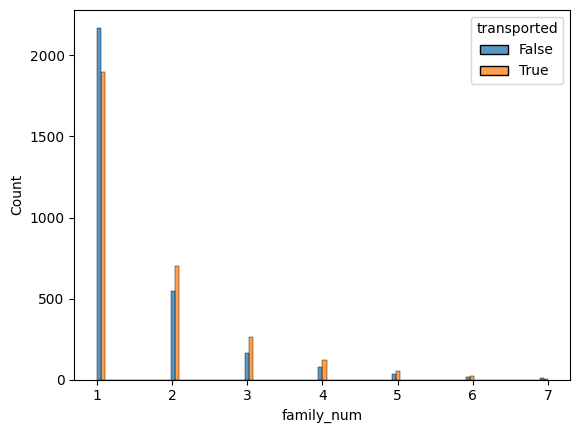

In [446]:
sns.histplot(train, x= 'family_num', hue='transported', multiple='dodge')

In [447]:
def add_family_size(family_num):
    result = "alone"
    if family_num == 1:
        result = "alone"
    elif family_num >= 2 and family_num <= 6:
        result = "small"
    else:
        result = "big"
    return result

train['family_size'] = train['family_num'].map(lambda x : add_family_size(x))
test['family_size'] = test['family_num'].map(lambda x : add_family_size(x))
ori_te['family_size'] = ori_te['family_num'].map(lambda x : add_family_size(x))

train.head()

,homeplanet,cryosleep,destination,age,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,transported,group,passenger_num,last name,room_deck,room_num,room_side,family_num,family_size
4048,Mars,True,55 Cancri e,1.0,False,0.0,0.0,0.0,0.0,0.0,True,4324,04,Brie,F,810,S,1,alone
7129,Earth,True,PSO J318.5-22,67.0,False,0.0,0.0,0.0,0.0,0.0,True,7598,01,Ingston,G,1231,S,1,alone
8550,Earth,False,TRAPPIST-1e,21.0,False,0.0,1.0,0.0,808.0,0.0,False,9129,01,Graneyes,G,1485,P,1,alone
2279,Mars,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,False,2449,02,Nacke,E,146,P,3,small
3981,Earth,False,TRAPPIST-1e,29.0,False,715.0,0.0,0.0,698.0,106.0,False,4251,01,Connelson,F,879,P,1,alone


## add_sun_size

In [448]:
sun = train['last name'].value_counts()
sun = pd.DataFrame({
    'last name': sun.index.to_list(),
    'sun_num': sun.values.tolist()
})
train = pd.merge(train, sun, on='last name', how='left')

In [449]:
sun = test['last name'].value_counts()
sun = pd.DataFrame({
    'last name': sun.index.to_list(),
    'sun_num': sun.values.tolist()
})
test = pd.merge(test, sun, on='last name', how='left')

sun = ori_te['last name'].value_counts()
sun = pd.DataFrame({
    'last name': sun.index.to_list(),
    'sun_num': sun.values.tolist()
})
ori_te = pd.merge(ori_te, sun, on='last name', how='left')

In [450]:
train.head()

,homeplanet,cryosleep,destination,age,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,transported,group,passenger_num,last name,room_deck,room_num,room_side,family_num,family_size,sun_num
0,Mars,True,55 Cancri e,1.0,False,0.0,0.0,0.0,0.0,0.0,True,4324,04,Brie,F,810,S,1,alone,2
1,Earth,True,PSO J318.5-22,67.0,False,0.0,0.0,0.0,0.0,0.0,True,7598,01,Ingston,G,1231,S,1,alone,7
2,Earth,False,TRAPPIST-1e,21.0,False,0.0,1.0,0.0,808.0,0.0,False,9129,01,Graneyes,G,1485,P,1,alone,2
3,Mars,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,False,2449,02,Nacke,E,146,P,3,small,5
4,Earth,False,TRAPPIST-1e,29.0,False,715.0,0.0,0.0,698.0,106.0,False,4251,01,Connelson,F,879,P,1,alone,2


<Axes: xlabel='sun_num', ylabel='Count'>

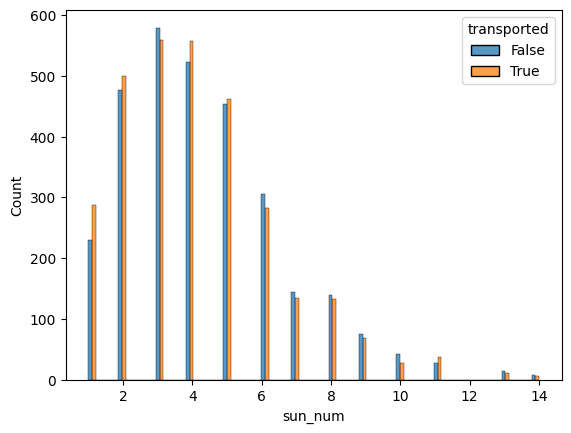

In [451]:
sns.histplot(train, x= 'sun_num', hue='transported', multiple='dodge')

In [452]:
def add_sun_size(sun_num):
    result = "alone"
    if sun_num == 0:
        result = "alone"
    elif sun_num >= 1 and sun_num <= 5:
        result = "small"
    else:
        result = "big"
    return result

train['sun_size'] = train['sun_num'].map(lambda x : add_sun_size(x))
test['sun_size'] = test['sun_num'].map(lambda x : add_sun_size(x))
ori_te['sun_size'] = ori_te['sun_num'].map(lambda x : add_sun_size(x))

train.head()

,homeplanet,cryosleep,destination,age,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,...,group,passenger_num,last name,room_deck,room_num,room_side,family_num,family_size,sun_num,sun_size
0,Mars,True,55 Cancri e,1.0,False,0.0,0.0,0.0,0.0,0.0,...,4324,04,Brie,F,810,S,1,alone,2,small
1,Earth,True,PSO J318.5-22,67.0,False,0.0,0.0,0.0,0.0,0.0,...,7598,01,Ingston,G,1231,S,1,alone,7,big
2,Earth,False,TRAPPIST-1e,21.0,False,0.0,1.0,0.0,808.0,0.0,...,9129,01,Graneyes,G,1485,P,1,alone,2,small
3,Mars,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,...,2449,02,Nacke,E,146,P,3,small,5,small
4,Earth,False,TRAPPIST-1e,29.0,False,715.0,0.0,0.0,698.0,106.0,...,4251,01,Connelson,F,879,P,1,alone,2,small


## add_adolescent

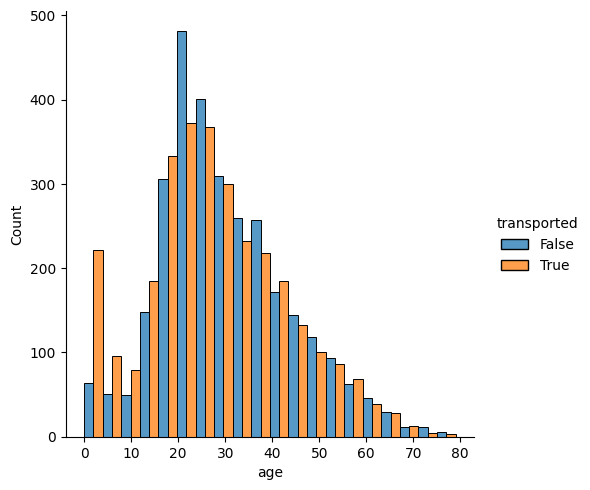

In [453]:
sns.displot(train, x='age', hue='transported', multiple='dodge', bins=20)

In [454]:
def add_adolescent(age):
    result = 0
    if age <= 20:
        result = 1
    elif age <= 40:
        result = 2
    else:
        result = 3
    return result
train['adolescent'] = train['age'].map(lambda x: add_adolescent(x))
test['adolescent'] = test['age'].map(lambda x: add_adolescent(x))
ori_te['adolescent'] = ori_te['age'].map(lambda x: add_adolescent(x))

train.head()

,homeplanet,cryosleep,destination,age,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,...,passenger_num,last name,room_deck,room_num,room_side,family_num,family_size,sun_num,sun_size,adolescent
0,Mars,True,55 Cancri e,1.0,False,0.0,0.0,0.0,0.0,0.0,...,04,Brie,F,810,S,1,alone,2,small,1
1,Earth,True,PSO J318.5-22,67.0,False,0.0,0.0,0.0,0.0,0.0,...,01,Ingston,G,1231,S,1,alone,7,big,3
2,Earth,False,TRAPPIST-1e,21.0,False,0.0,1.0,0.0,808.0,0.0,...,01,Graneyes,G,1485,P,1,alone,2,small,2
3,Mars,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,...,02,Nacke,E,146,P,3,small,5,small,2
4,Earth,False,TRAPPIST-1e,29.0,False,715.0,0.0,0.0,698.0,106.0,...,01,Connelson,F,879,P,1,alone,2,small,2


## add_no_service

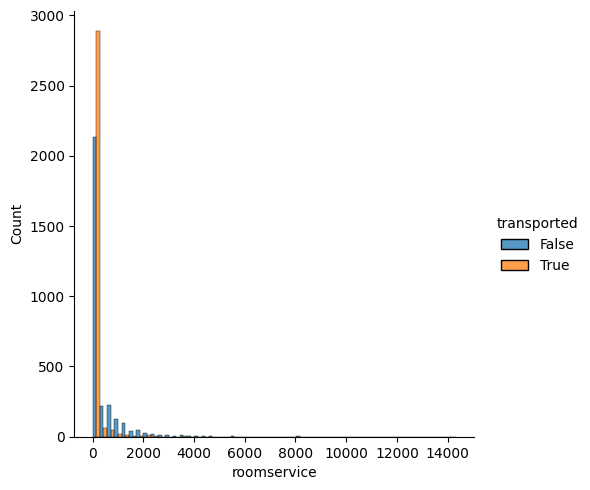

In [455]:
sns.displot(train, x='roomservice', hue='transported', bins=50, multiple='dodge')

In [456]:
def add_no_service(roomservice, spa, vrdeck, foodcourt, shoppingmall):
    result = 0
    if roomservice == 0 and spa == 0 and vrdeck == 0 and foodcourt == 0 and shoppingmall == 0:
        result = 1
    return result

train['no_service'] = train.apply(lambda row: add_no_service(row['roomservice'], row['spa'], row['vrdeck'], row['foodcourt'], row['shoppingmall']), axis=1)
test['no_service'] = test.apply(lambda row: add_no_service(row['roomservice'], row['spa'], row['vrdeck'], row['foodcourt'], row['shoppingmall']), axis=1)
ori_te['no_service'] = ori_te.apply(lambda row: add_no_service(row['roomservice'], row['spa'], row['vrdeck'], row['foodcourt'], row['shoppingmall']), axis=1)
train.head()

,homeplanet,cryosleep,destination,age,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,...,last name,room_deck,room_num,room_side,family_num,family_size,sun_num,sun_size,adolescent,no_service
0,Mars,True,55 Cancri e,1.0,False,0.0,0.0,0.0,0.0,0.0,...,Brie,F,810,S,1,alone,2,small,1,1
1,Earth,True,PSO J318.5-22,67.0,False,0.0,0.0,0.0,0.0,0.0,...,Ingston,G,1231,S,1,alone,7,big,3,1
2,Earth,False,TRAPPIST-1e,21.0,False,0.0,1.0,0.0,808.0,0.0,...,Graneyes,G,1485,P,1,alone,2,small,2,0
3,Mars,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,...,Nacke,E,146,P,3,small,5,small,2,1
4,Earth,False,TRAPPIST-1e,29.0,False,715.0,0.0,0.0,698.0,106.0,...,Connelson,F,879,P,1,alone,2,small,2,0


## add_home_sleep

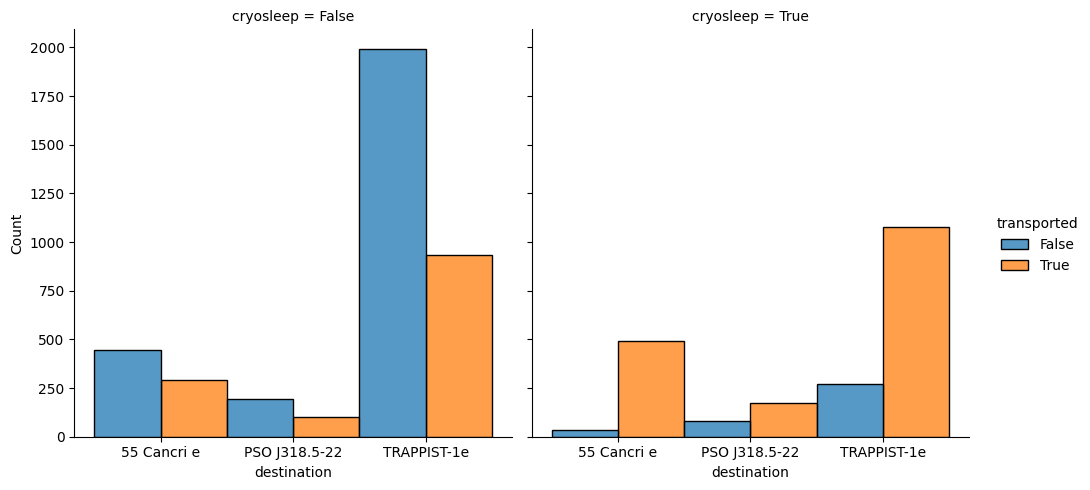

In [457]:
sns.displot(train, x='destination', hue='transported', bins=50, multiple='dodge', col='cryosleep')

In [458]:
# def add_home_sleep(homeplanet, cryosleep):
#     result = 0
#     if homeplanet == "Mars" or homeplanet == "Europa":
#         if cryosleep == True:
#             result = 1
#     return result
# train['home_sleep'] = train.apply(lambda row: add_home_sleep(row['homeplanet'], row['cryosleep']), axis=1)
# test['home_sleep'] = test.apply(lambda row: add_home_sleep(row['homeplanet'], row['cryosleep']), axis=1)
# ori_te['home_sleep'] = ori_te.apply(lambda row: add_home_sleep(row['homeplanet'], row['cryosleep']), axis=1)

# train.head()

## add_sleep_deck

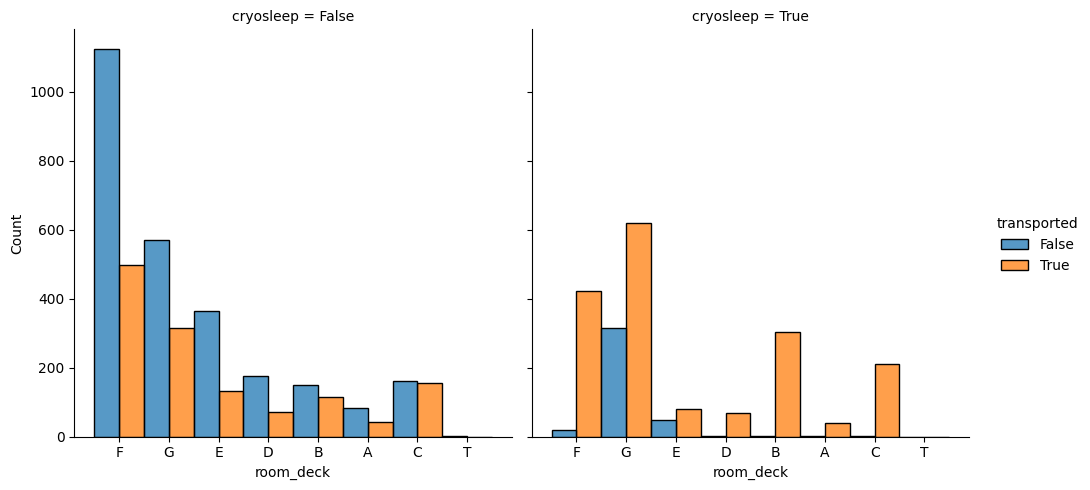

In [459]:
sns.displot(train, x='room_deck', hue='transported', multiple='dodge', col='cryosleep')

In [460]:
# def add_sleep_deck(room_deck, cryosleep):
#     result = 0
#     if room_deck != "G" and room_deck != "E":
#         if cryosleep == True:
#             result = 1
#     return result

# train['sleep_deck'] = train.apply(lambda row: add_sleep_deck(row['room_deck'], row['cryosleep']), axis=1)
# test['sleep_deck'] = test.apply(lambda row: add_sleep_deck(row['room_deck'], row['cryosleep']), axis=1)
# ori_te['sleep_deck'] = ori_te.apply(lambda row: add_sleep_deck(row['room_deck'], row['cryosleep']), axis=1)

# train.head()

In [461]:
train.drop(['last name', 'room_num'], axis=1, inplace=True)
test.drop(['last name', 'room_num'], axis=1, inplace=True)
ori_te.drop(['last name', 'room_num'], axis=1, inplace=True)

In [462]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6085 entries, 0 to 6084
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   homeplanet     6085 non-null   object 
 1   cryosleep      6085 non-null   bool   
 2   destination    6085 non-null   object 
 3   age            6085 non-null   float64
 4   vip            6085 non-null   bool   
 5   roomservice    6085 non-null   float64
 6   foodcourt      6085 non-null   float64
 7   shoppingmall   6085 non-null   float64
 8   spa            6085 non-null   float64
 9   vrdeck         6085 non-null   float64
 10  transported    6085 non-null   bool   
 11  group          6085 non-null   object 
 12  passenger_num  6085 non-null   object 
 13  room_deck      6085 non-null   object 
 14  room_side      6085 non-null   object 
 15  family_num     6085 non-null   int64  
 16  family_size    6085 non-null   object 
 17  sun_num        6085 non-null   int64  
 18  sun_size

## add_expenditure

In [463]:
train['expenditure'] = train[['roomservice','foodcourt', 'shoppingmall', 'spa', 'vrdeck']].sum(axis=1)
test['expenditure'] = test[['roomservice','foodcourt', 'shoppingmall', 'spa', 'vrdeck']].sum(axis=1)
ori_te['expenditure'] = ori_te[['roomservice','foodcourt', 'shoppingmall', 'spa', 'vrdeck']].sum(axis=1)

In [464]:
train.head()

,homeplanet,cryosleep,destination,age,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,...,passenger_num,room_deck,room_side,family_num,family_size,sun_num,sun_size,adolescent,no_service,expenditure
0,Mars,True,55 Cancri e,1.0,False,0.0,0.0,0.0,0.0,0.0,...,04,F,S,1,alone,2,small,1,1,0.0
1,Earth,True,PSO J318.5-22,67.0,False,0.0,0.0,0.0,0.0,0.0,...,01,G,S,1,alone,7,big,3,1,0.0
2,Earth,False,TRAPPIST-1e,21.0,False,0.0,1.0,0.0,808.0,0.0,...,01,G,P,1,alone,2,small,2,0,809.0
3,Mars,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,...,02,E,P,3,small,5,small,2,1,0.0
4,Earth,False,TRAPPIST-1e,29.0,False,715.0,0.0,0.0,698.0,106.0,...,01,F,P,1,alone,2,small,2,0,1519.0


## add_expenditure_group

In [465]:
train.expenditure.describe()

count     6085.000000
mean      1433.725062
std       2819.371238
min          0.000000
25%          0.000000
50%        716.000000
75%       1428.000000
max      35987.000000
Name: expenditure, dtype: float64

In [466]:
def add_expenditure_group(expenditure):
    result = 0
    if expenditure <= 716:
        result = 1
    elif expenditure <= 1428:
        result = 2
    else:
        result = 3
    return result

In [467]:
train['expenditure_group'] = train['expenditure'].map(lambda x : add_expenditure_group(x))
test['expenditure_group'] = test['expenditure'].map(lambda x : add_expenditure_group(x))
ori_te['expenditure_group'] = ori_te['expenditure'].map(lambda x : add_expenditure_group(x))

In [468]:
train.head()

,homeplanet,cryosleep,destination,age,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,...,room_deck,room_side,family_num,family_size,sun_num,sun_size,adolescent,no_service,expenditure,expenditure_group
0,Mars,True,55 Cancri e,1.0,False,0.0,0.0,0.0,0.0,0.0,...,F,S,1,alone,2,small,1,1,0.0,1
1,Earth,True,PSO J318.5-22,67.0,False,0.0,0.0,0.0,0.0,0.0,...,G,S,1,alone,7,big,3,1,0.0,1
2,Earth,False,TRAPPIST-1e,21.0,False,0.0,1.0,0.0,808.0,0.0,...,G,P,1,alone,2,small,2,0,809.0,2
3,Mars,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,...,E,P,3,small,5,small,2,1,0.0,1
4,Earth,False,TRAPPIST-1e,29.0,False,715.0,0.0,0.0,698.0,106.0,...,F,P,1,alone,2,small,2,0,1519.0,3


## add home_dest

In [469]:
train['home_dest'] =  train['homeplanet'] + train['destination']
train['home_dest'] = train['home_dest'].apply(lambda x: x.strip())
test['home_dest'] =  test['homeplanet'] + test['destination']
test['home_dest'] = test['home_dest'].apply(lambda x: x.strip())
ori_te['home_dest'] =  ori_te['homeplanet'] + ori_te['destination']
ori_te['home_dest'] = ori_te['home_dest'].apply(lambda x: x.strip())

train.head()

,homeplanet,cryosleep,destination,age,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,...,room_side,family_num,family_size,sun_num,sun_size,adolescent,no_service,expenditure,expenditure_group,home_dest
0,Mars,True,55 Cancri e,1.0,False,0.0,0.0,0.0,0.0,0.0,...,S,1,alone,2,small,1,1,0.0,1,Mars55 Cancri e
1,Earth,True,PSO J318.5-22,67.0,False,0.0,0.0,0.0,0.0,0.0,...,S,1,alone,7,big,3,1,0.0,1,EarthPSO J318.5-22
2,Earth,False,TRAPPIST-1e,21.0,False,0.0,1.0,0.0,808.0,0.0,...,P,1,alone,2,small,2,0,809.0,2,EarthTRAPPIST-1e
3,Mars,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,...,P,3,small,5,small,2,1,0.0,1,MarsTRAPPIST-1e
4,Earth,False,TRAPPIST-1e,29.0,False,715.0,0.0,0.0,698.0,106.0,...,P,1,alone,2,small,2,0,1519.0,3,EarthTRAPPIST-1e


# Drop columns

In [470]:
train.drop(['group', 'family_num'], axis=1, inplace=True)
test.drop(['group', 'family_num'], axis=1, inplace=True)
ori_te.drop(['group', 'family_num'], axis=1, inplace=True)

# X, y split

In [471]:
y_tr = train['transported']
X_tr = train.drop(['transported'], axis=1)

y_te = test['transported']
X_te = test.drop(['transported'], axis=1)

X_tr.shape, y_tr.shape, X_te.shape, y_te.shape

((6085, 21), (6085,), (2608, 21), (2608,))

# Scaling

In [472]:
from sklearn.preprocessing import StandardScaler

In [473]:
scale = StandardScaler().fit(train[['age']])

train['age'] = scale.transform(train[['age']])
test['age'] = scale.transform(test[['age']])
ori_te['age'] = scale.transform(ori_te[['age']])

# One Hot Encoding

In [474]:
from sklearn.preprocessing import OneHotEncoder

In [475]:
X_tr.columns

Index(['homeplanet', 'cryosleep', 'destination', 'age', 'vip', 'roomservice',
       'foodcourt', 'shoppingmall', 'spa', 'vrdeck', 'passenger_num',
       'room_deck', 'room_side', 'family_size', 'sun_num', 'sun_size',
       'adolescent', 'no_service', 'expenditure', 'expenditure_group',
       'home_dest'],
      dtype='object')

In [476]:
enc_cols = ['homeplanet', 'cryosleep', 'destination', 'vip', 'passenger_num',
        'room_deck', 'room_side', 'sun_size', 'adolescent', 'sun_num', 'home_dest',
        'no_service', 'expenditure_group', 'family_size'] # 문자 컬럼
normal_cols = list(set(X_tr.columns) - set(enc_cols)) # 집합 사용해 수치형 컬럼만 빼기
normal_cols

['spa',
 'roomservice',
 'expenditure',
 'shoppingmall',
 'age',
 'vrdeck',
 'foodcourt']

In [477]:
print(f'before: {X_tr.shape} / {X_te.shape}')

enc = OneHotEncoder()
# X_tr
tmp_tr = pd.DataFrame(
    enc.fit_transform(X_tr[enc_cols]).toarray(),
    columns = enc.get_feature_names_out()
)
enc_tr = pd.concat(
    [X_tr[normal_cols].reset_index(drop=True), tmp_tr.reset_index(drop=True)],
    axis=1
)

# X_te
tmp_te = pd.DataFrame(
    enc.transform(X_te[enc_cols]).toarray(), # 앞서 tr으로 fit한걸 사용해서 그냥 변환만 함
    columns = enc.get_feature_names_out() 
)
enc_te = pd.concat(
    [X_te[normal_cols].reset_index(drop=True), tmp_te.reset_index(drop=True)],
    axis=1
)

#ori_te
tmp_ote = pd.DataFrame(
    enc.transform(ori_te[enc_cols]).toarray(),
    columns = enc.get_feature_names_out()
)
enc_ori_te = pd.concat(
    [ori_te[normal_cols].reset_index(drop=True), tmp_ote.reset_index(drop=True)],
    axis=1
)

print(f'after: {enc_tr.shape} / {enc_te.shape}')
enc_tr.head()

before: (6085, 21) / (2608, 21)
after: (6085, 70) / (2608, 70)


,spa,roomservice,expenditure,shoppingmall,age,vrdeck,foodcourt,homeplanet_Earth,homeplanet_Europa,homeplanet_Mars,...,home_dest_MarsPSO J318.5-22,home_dest_MarsTRAPPIST-1e,no_service_0,no_service_1,expenditure_group_1,expenditure_group_2,expenditure_group_3,family_size_alone,family_size_big,family_size_small
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,67.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2,808.0,0.0,809.0,0.0,21.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,27.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,698.0,715.0,1519.0,0.0,29.0,106.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


# Training

In [478]:
enc_tr.isnull().sum().sum(), enc_te.isnull().sum().sum(), enc_ori_te.isnull().sum().sum()

(0, 0, 0)

In [479]:
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

def confusion(actual, pred):
  preds_1d = pred.flatten() # 차원 펴주기
  pred_class = np.where(preds_1d > 0.5, 1 , 0) 

  cm = confusion_matrix(actual, pred_class)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot(cmap='PuBu')

In [480]:
# importance 낮은 열 제거
enc_tr.drop(['room_deck_T', 'adolescent_3', 'passenger_num_08', 'home_dest_EuropaPSO J318.5-22',
             'sun_num_14', 'family_size_big', 'sun_num_13', 'passenger_num_07', 'home_dest_Mars55 Cancri e',
             'no_service_1', 'home_dest_MarsPSO J318.5-22' ], axis=1, inplace=True)
enc_te.drop(['room_deck_T', 'adolescent_3', 'passenger_num_08', 'home_dest_EuropaPSO J318.5-22',
             'sun_num_14', 'family_size_big', 'sun_num_13', 'passenger_num_07', 'home_dest_Mars55 Cancri e',
             'no_service_1', 'home_dest_MarsPSO J318.5-22' ], axis=1, inplace=True)
enc_ori_te.drop(['room_deck_T', 'adolescent_3', 'passenger_num_08', 'home_dest_EuropaPSO J318.5-22',
                 'sun_num_14', 'family_size_big', 'sun_num_13', 'passenger_num_07', 'home_dest_Mars55 Cancri e',
                 'no_service_1', 'home_dest_MarsPSO J318.5-22' ], axis=1, inplace=True)

## LogisticRegression

In [481]:
from sklearn.linear_model import LogisticRegression

In [482]:
lr = LogisticRegression(random_state=args.random_state).fit(enc_tr, y_tr)

print(f'훈련용 평가지표: {lr.score(enc_tr, y_tr)} / 테스트용 평가지표: {lr.score(enc_te, y_te)}')

훈련용 평가지표: 0.7891536565324568 / 테스트용 평가지표: 0.7914110429447853


In [483]:
from sklearn.metrics import accuracy_score

y_pred_lr = lr.predict(enc_te)
accuracy_te = accuracy_score(y_te, y_pred_lr)
print(f'model: {accuracy_te}')

model: 0.7914110429447853


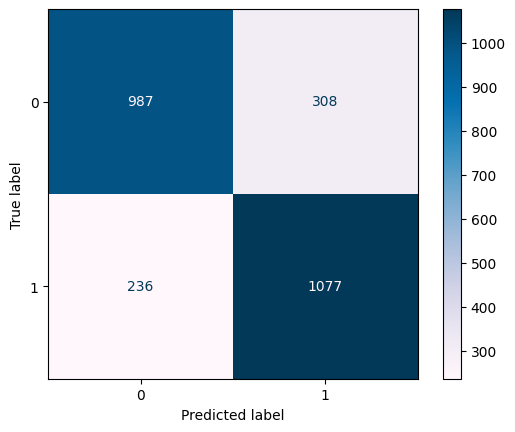

In [484]:
confusion(y_te, y_pred_lr)

## RandomForest

In [485]:
from sklearn.ensemble import RandomForestClassifier 

In [486]:
forest = RandomForestClassifier(random_state=args.random_state).fit(enc_tr, y_tr)
print(f'훈련용 평가지표: {forest.score(enc_tr, y_tr)} / 테스트용 평가지표: {forest.score(enc_te, y_te)}')

훈련용 평가지표: 0.9898110106820049 / 테스트용 평가지표: 0.7641871165644172


In [487]:
from sklearn.metrics import accuracy_score

y_pred_forest = forest.predict(enc_te)
accuracy_te = accuracy_score(y_te, y_pred_forest)
print(f'model: {accuracy_te}')

model: 0.7641871165644172


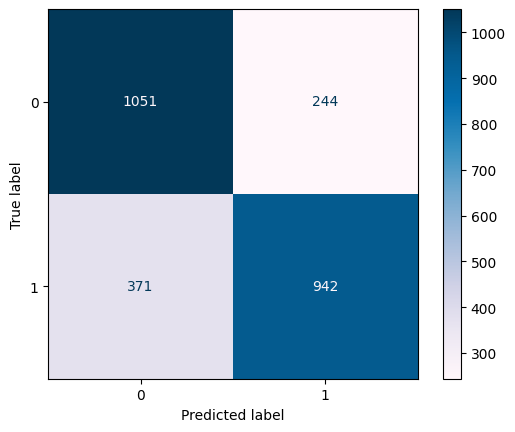

In [488]:
confusion(y_te, y_pred_forest)

## GradientBoostingClassifier

In [489]:
from sklearn.ensemble import GradientBoostingClassifier

In [490]:
gradient = GradientBoostingClassifier(random_state=args.random_state).fit(enc_tr, y_tr)
print(f'훈련용 평가지표: {gradient.score(enc_tr, y_tr)} / 테스트용 평가지표: {gradient.score(enc_te, y_te)}')

훈련용 평가지표: 0.8180772391125719 / 테스트용 평가지표: 0.7979294478527608


In [491]:
from sklearn.metrics import accuracy_score

y_pred_gradient = gradient.predict(enc_te)
accuracy_te = accuracy_score(y_te, y_pred_gradient)
print(f'model: {accuracy_te}')

model: 0.7979294478527608


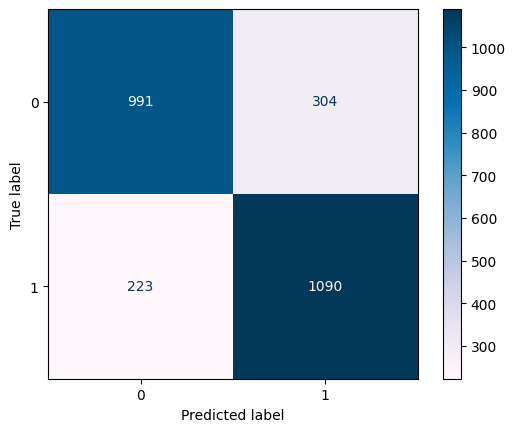

In [492]:
confusion(y_te, y_pred_gradient)

## XGBoost

In [493]:
from xgboost import XGBClassifier, plot_importance

In [494]:
xgb = XGBClassifier(random_state=args.random_state).fit(enc_tr, y_tr)
print(f'훈련용 평가지표 : {xgb.score(enc_tr, y_tr)} / 테스트용 평가지표 : {xgb.score(enc_te, y_te)}')

훈련용 평가지표 : 0.9258833196384553 / 테스트용 평가지표 : 0.790260736196319


In [495]:
from sklearn.metrics import accuracy_score

y_pred_xgb = xgb.predict(enc_te)
accuracy_te = accuracy_score(y_te, y_pred_xgb)
print(f'model: {accuracy_te}')

model: 0.790260736196319


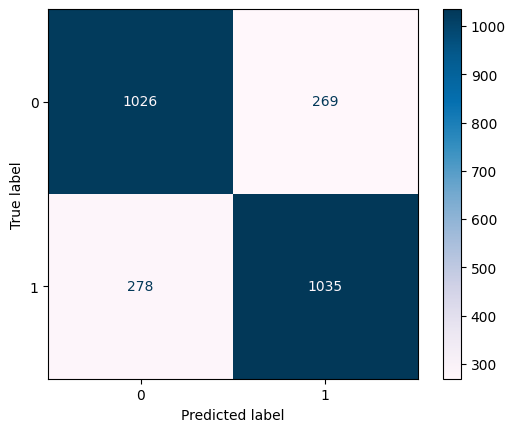

In [496]:
confusion(y_te, y_pred_xgb)

## LightGBM

In [497]:
from lightgbm import LGBMClassifier, plot_importance

In [498]:
lgb = LGBMClassifier(random_state=args.random_state).fit(enc_tr, y_tr)
print(f'훈련용 평가지표 : {lgb.score(enc_tr, y_tr)} / 테스트용 평가지표 : {lgb.score(enc_te, y_te)}')

훈련용 평가지표 : 0.8820049301561216 / 테스트용 평가지표 : 0.7948619631901841


In [499]:
y_pred_lgb = lgb.predict(enc_te)
accuracy_te = accuracy_score(y_te, y_pred_lgb)
print(f'model: {accuracy_te}')

model: 0.7948619631901841


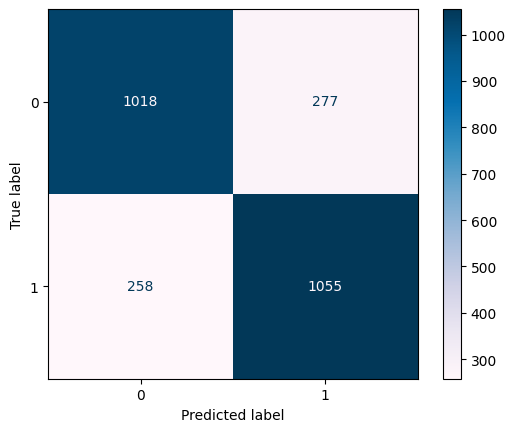

In [500]:
confusion(y_te, y_pred_lgb)

## CatBoost

In [501]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [502]:
from catboost import CatBoostClassifier

In [503]:
y_tr = y_tr.astype('i')
y_te = y_te.astype('i')
y_tr.info()

<class 'pandas.core.series.Series'>
Int64Index: 6085 entries, 0 to 6084
Series name: transported
Non-Null Count  Dtype
--------------  -----
6085 non-null   int32
dtypes: int32(1)
memory usage: 200.3 KB


In [504]:
cb = CatBoostClassifier(random_state=args.random_state, verbose=False).fit(enc_tr, y_tr)
print(f'훈련용 평가지표 : {cb.score(enc_tr, y_tr)} / 테스트용 평가지표 : {cb.score(enc_te, y_te)}')

훈련용 평가지표 : 0.876417419884963 / 테스트용 평가지표 : 0.8090490797546013


In [505]:
y_pred_cb = cb.predict(enc_te)
accuracy_te = accuracy_score(y_te, y_pred_cb)
print(f'model: {accuracy_te}')

model: 0.8090490797546013


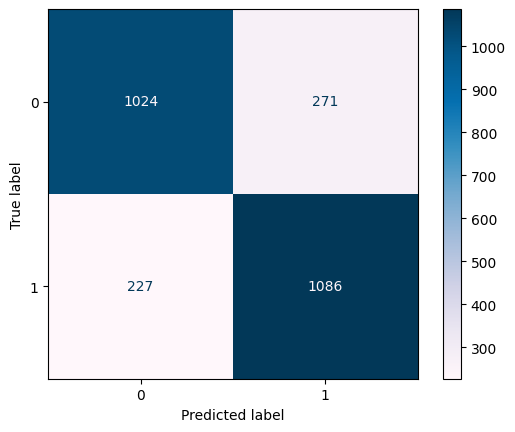

In [506]:
confusion(y_te, y_pred_cb)

## Stratified K-Fold Validation

In [507]:
from sklearn.model_selection import StratifiedKFold

In [508]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=args.random_state)

In [509]:
n_iter = 0
accuracy_list = []
methods = [forest, gradient, xgb, lgb, cb]

for method in methods :
  for train_index, valid_index in skf.split(enc_tr, y_tr) :
    n_iter += 1

    train_x, valid_x = enc_tr.iloc[train_index], enc_tr.iloc[valid_index]
    train_y, valid_y = y_tr.iloc[train_index], y_tr.iloc[valid_index]

    method.fit(enc_tr, y_tr)
    pred = method.predict(valid_x)

    accuracy_te = accuracy_score(valid_y, pred)
    accuracy_list.append(accuracy_te)
  
  print(f'model : {method}')
  print(f'교차 검증 정확도 : {np.mean(accuracy_list)} / 모델 평가 : {method.score(enc_te, y_te)}')
  print('-'*50)

model : RandomForestClassifier(random_state=21)
교차 검증 정확도 : 0.9898110106820048 / 모델 평가 : 0.7641871165644172
--------------------------------------------------
model : GradientBoostingClassifier(random_state=21)
교차 검증 정확도 : 0.9039441248972884 / 모델 평가 : 0.7979294478527608
--------------------------------------------------
model : XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=No

## Bayesian Search

In [510]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [511]:
import optuna
from sklearn.model_selection import cross_val_score

### TPESampler

In [512]:
from optuna.samplers import TPESampler
optuna.logging.disable_default_handler()

In [513]:
class Objective:
    def __init__(self, x_train ,y_train, seed):
        self.x_train = enc_tr
        self.y_train = y_tr
        self.seed = args.random_state
        num_folds = 5 
        self.cv = StratifiedKFold(n_splits=num_folds,shuffle=True,random_state=self.seed)

    def __call__(self, trial):

        hp = {
            "max_depth" : trial.suggest_int("max_depth",1, 6),
            "n_estimators" : trial.suggest_int("n_estimators",10,500,50),
            "learning_rate" : trial.suggest_float("learning_rate",0.01,0.2)
        }

        forest =  RandomForestClassifier
        gradient = GradientBoostingClassifier
        xgb = XGBClassifier
        lgb = LGBMClassifier
        cb = CatBoostClassifier

        model = lgb(random_state=self.seed,**hp)
        scores = cross_val_score(model, self.x_train, self.y_train, cv = self.cv , scoring="accuracy")
        return np.mean(scores)

In [514]:
sampler = TPESampler(seed=args.random_state) 

# 스터디 객체
study = optuna.create_study(
    direction = "maximize", # maximize or minimize
    sampler = sampler
)
objective = Objective(enc_tr, y_tr, args.random_state)
study.optimize(objective, n_trials=50)

print("Best Score:", study.best_value) 
print("Best hp", study.best_params) 

Best Score: 0.8034511092851273
Best hp {'max_depth': 4, 'n_estimators': 210, 'learning_rate': 0.060224318296285675}


In [515]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score

In [516]:
model = LGBMClassifier(random_state=args.random_state, **study.best_params)
model.fit(enc_tr, y_tr)

pred = model.predict(enc_te)
accuracy_score(y_te, pred)

0.8059815950920245

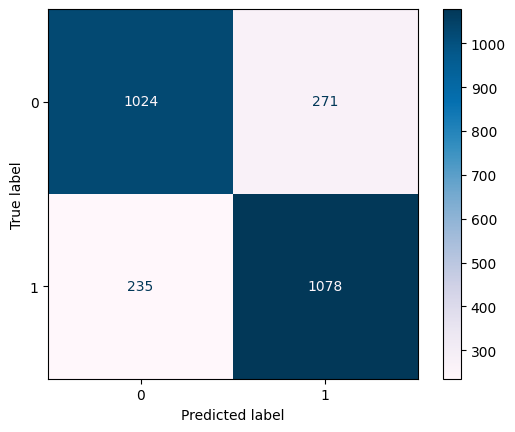

In [517]:
confusion(y_te, pred)

In [518]:
optuna.visualization.plot_param_importances(study)

## SHAP

In [519]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [520]:
import shap

In [521]:
explainer = shap.TreeExplainer(model) # 학습된 모델을 넣기
shap_values = explainer.shap_values(enc_te)

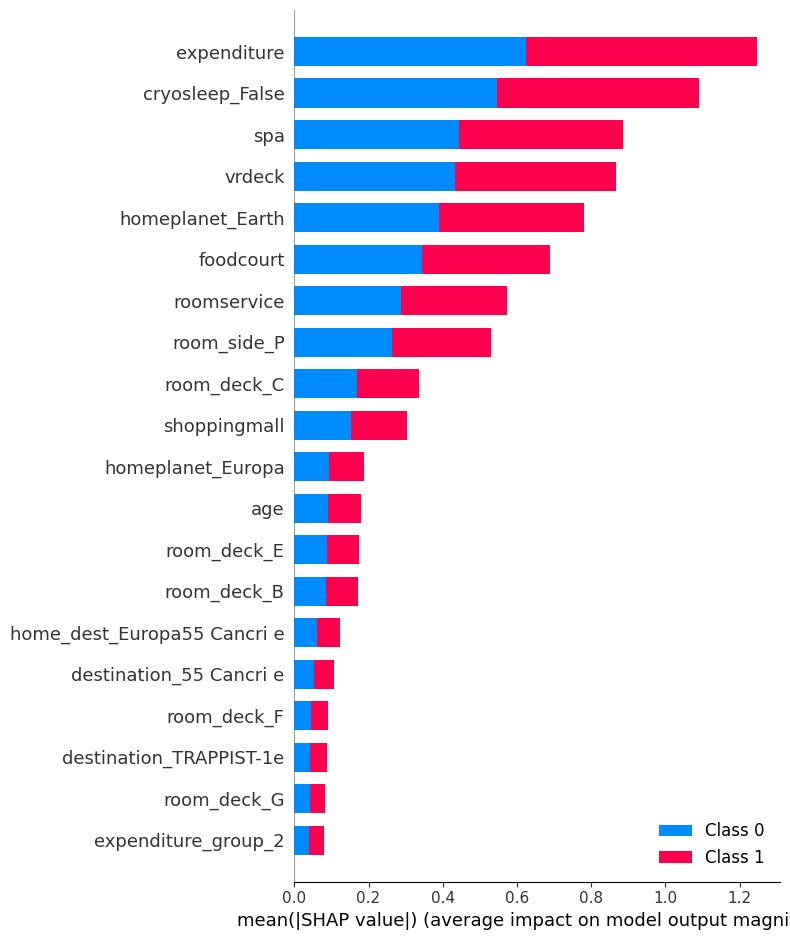

In [522]:
shap.summary_plot(shap_values, enc_te)

## Feature importance

In [523]:
ori_proba = model.predict_proba(enc_ori_te)[:,1]
ori_proba.shape

(4277,)

In [524]:
df_feature_importances = pd.DataFrame(model.feature_importances_, enc_tr.columns).sort_values(by=[0], ascending=False).reset_index()

print(f'{df_feature_importances.shape}')
df_feature_importances.tail(20)

(59, 2)


,index,0
39,room_deck_D,6
40,sun_num_8,6
41,passenger_num_03,6
42,sun_size_small,5
43,expenditure_group_1,5
44,destination_PSO J318.5-22,4
45,sun_num_2,4
46,family_size_small,3
47,home_dest_EuropaTRAPPIST-1e,2
48,sun_num_11,1


# Submission

In [526]:
submission = pd.read_csv(args.default_submission_csv)
print(f'{submission.shape}')
submission.head()

(4277, 2)


,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


In [527]:
test_pred = model.predict(enc_ori_te)
test_pred = test_pred.astype('bool')

In [528]:
submission['Transported'] = test_pred
submission

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [529]:
args.submission_csv = args.default_path+'submission_eighth.csv'
submission.to_csv(args.submission_csv, header=True, index=False)